In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2 
import pandas as pd
import datetime as datetime
from statsmodels.tsa.ar_model import AR
from random import random
from statsmodels.tsa.seasonal import seasonal_decompose
import os as os
import hvplot.pandas
import matplotlib.pylab as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
flx_hh = pd.read_csv('FLUXNET/AMF_US-ARM_BASE-BADM_8-5/AMF_US-ARM_BASE_HH_8-5.csv',index_col=0, parse_dates=True, header = 2, na_values = -9999.0)

In [13]:
flx_daily=flx_hh.resample('1d').mean()
flx_daily.describe()

,TIMESTAMP_END,CO2_1_1_1,H2O_1_1_1,TAU_1_1_1,TAU_SSITC_TEST_1_1_1,H_1_1_1,H_SSITC_TEST_1_1_1,LE_1_1_1,LE_SSITC_TEST_1_1_1,FC_1_1_1,...,SWC_2_3_1,SWC_2_3_2,TS_2_3_2,SWC_2_2_2,TS_2_2_2,SWC_2_1_2,TS_2_1_2,SW_DIR_1_1_1,SW_DIF_1_1_1,T_CANOPY_1_1_1
count,5.845000e+03,5380.000000,5372.000000,5655.000000,5655.000000,5655.000000,5655.000000,5599.000000,5633.000000,5612.000000,...,971.000000,954.000000,998.000000,930.000000,998.000000,998.000000,998.000000,956.000000,956.000000,956.000000
mean,2.010568e+11,394.124863,15.259148,-0.154284,0.271529,30.027223,0.260165,54.254078,0.350527,-0.497039,...,37.123129,35.099818,17.521852,36.541478,17.527573,21.012069,17.460423,131.154454,70.259005,16.571725
std,4.611154e+08,15.196368,8.474673,0.135532,0.213989,34.027330,0.193243,41.622265,0.238800,2.354354,...,6.254698,7.921577,7.367402,7.663082,7.908133,8.808017,8.786161,89.490660,35.641640,10.713424
min,2.003010e+11,307.438462,0.376321,-3.437507,0.000000,-124.703810,0.000000,-8.785639,0.000000,-21.481185,...,6.686389,8.367778,3.243474,6.595833,1.628132,4.586389,-1.559977,-0.218808,1.728413,-13.187817
25%,2.007010e+11,385.197272,7.868804,-0.205086,0.104167,6.559483,0.104167,22.240531,0.166667,-1.420004,...,32.494653,29.464358,10.810097,30.671686,10.722340,14.147965,10.095627,59.661221,41.044212,7.910632
50%,2.011010e+11,394.528393,13.453270,-0.116936,0.229167,23.286658,0.229167,42.241155,0.315789,-0.184881,...,36.213194,33.380972,17.457267,35.867326,17.567448,16.876424,17.437573,126.613269,64.613451,17.663080
75%,2.015010e+11,404.114612,22.365022,-0.066346,0.416667,50.068241,0.375000,76.997239,0.500000,0.827160,...,41.943472,41.918681,24.841741,43.486627,25.248738,27.903993,25.841453,196.876716,97.628695,26.002694
max,2.019010e+11,476.664707,38.243230,-0.002820,1.368421,537.150188,1.333333,392.817851,2.000000,13.116404,...,49.985000,50.000000,30.291188,50.000000,31.302792,40.973333,33.330854,562.016270,177.834733,38.673549


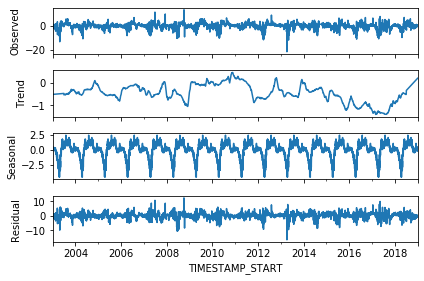

In [8]:
# Additive Decomposition
result_add = seasonal_decompose(flx_daily.FC_1_1_1.fillna(method='pad'), model='additive', freq=365, extrapolate_trend='freq')

# Plot
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot();

In [9]:
flx_daily.FC_1_1_1.fillna(method='pad').hvplot()

:Curve   [TIMESTAMP_START]   (FC_1_1_1)

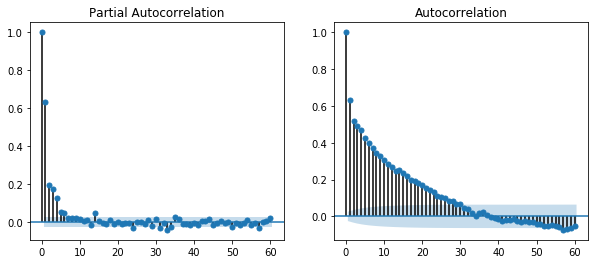

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig,axes = plt.subplots(1, 2, figsize = (10,4))

plot_pacf(result_add.resid, lags = 60, ax = axes[0])
plot_acf(result_add.resid, lags = 60, ax = axes[1]);